# Ultrasound coagulation of particles

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load data from files

### Представлены результаты исследования процесса коагуляции аэрозоля в модельной ультразвуковой (УЗ) камере скруббера.

- *D - дата проведения измерения
- T и Ts текущее время H:M и s
- Time (relative)  - относительное время измерения
- Transmission - процент пропускание средой лазерного луча 
- D\[3\]\[2\] - Средний объемно-поверхностный диаметр (Sautermean diameter) определялся по формуле 
$$
D[3][2] =  {\int_0^\infty D^3 f(D) dD \over\int_0^\infty D^2 f(D) dD}
$$
где 
D - диаметр частиц, 
f(D) - счетная функция распределения частиц по размерам

- С$_V$ - концентрация частиц
- значениния 0.00000020 ... 1000.00195313 являются значениями D в микрометрах в функции G(D)
#### G(D) -  массовая функция распределения частиц по размерам

### Data obtained on laser system Malvern Spraytec

- файл without.csv - данные получены без воздействия ультразвука на аэрозоль
- файл with_power100.csv - данные получены при воздействии ультразвука с максимальной мощностью
- файл with_power50.csv - данные получены при воздействии ультразвука с мощностью 50 % от максимальной

In [640]:
data_without = pd.read_table('./data/without.csv')
print(data_without.shape)
data_without.head()



(10781, 68)


,*D,T,Ts,Time (relative),Transmission,D[3][2],Cv(%),0.10000020,0.11659167,0.13593590,...,251.18913269,292.86502075,341.45556641,398.10794067,464.15979004,541.17059326,630.95855713,735.64367676,857.69757080,1000.00195313
0,06/06/2018,11:14,47,1,100.120781,9.298011e+00,0.000000e+00,-,0.000074,0.003059,...,5.210545,6.791101,8.086891,8.810597,8.790450,8.005728,6.562710,4.632730,2.392859,0.000000
1,06/06/2018,11:14,48,2,100.042488,-1.000000e+30,-1.000000e+26,-,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,06/06/2018,11:14,49,3,100.032578,9.918990e+00,0.000000e+00,-,0.040707,0.079949,...,5.461412,6.662920,7.648120,8.157163,8.032344,7.256748,5.920585,4.166681,2.147687,0.000000
3,06/06/2018,11:14,50,4,100.051689,2.745349e+01,0.000000e+00,-,0.008130,0.015890,...,3.855632,5.724406,7.574574,9.038911,9.821671,9.767801,8.877537,7.271666,5.134102,2.653317
4,06/06/2018,11:14,51,5,100.080368,5.805747e+01,0.000000e+00,-,0.000000,0.000000,...,4.730582,6.523129,8.293399,9.734172,10.553879,10.552511,9.666772,7.974712,5.656235,2.928329


In [641]:
data_usound_power100 = pd.read_table('./data/with_power100.csv')
print(data_usound_power100.shape)
data_usound_power100.head()

(5097, 68)


,*D,T,Ts,Time (relative),Transmission,D[3][2],Cv(%),0.10000020,0.11659167,0.13593590,...,251.18913269,292.86502075,341.45556641,398.10794067,464.15979004,541.17059326,630.95855713,735.64367676,857.69757080,1000.00195313
0,04/07/2018,10:00,55,1,100.272194,31.963284,0.0,-,0.0,0.0,...,0.000002,1.935043e-02,9.441035e-01,7.635603e+00,20.650616,24.158564,13.398155,3.408108,3.101457e-01,3.645984e-03
1,04/07/2018,10:00,56,2,100.227127,28.673588,0.0,-,0.0,0.0,...,0.008327,4.056452e-01,2.767870e+00,8.187497e+00,14.088978,15.867887,12.128207,6.096789,1.736686e+00,1.588112e-01
2,04/07/2018,10:00,57,3,100.274231,25.061186,0.0,-,0.0,0.0,...,0.000000,5.112816e-09,2.304540e-03,6.114225e-01,9.628938,25.034094,15.054618,2.104610,4.464902e-02,2.343016e-05
3,04/07/2018,10:00,58,4,100.279999,3.966140,0.0,-,0.0,0.0,...,0.000000,2.245575e-06,2.136216e-02,1.923927e+00,16.768860,28.447857,12.045750,1.261558,2.197584e-02,1.132118e-05
4,04/07/2018,10:00,59,5,100.285248,1.540757,0.0,-,0.0,0.0,...,0.000000,0.000000e+00,3.400687e-20,4.626820e-09,0.008096,10.412784,27.581274,0.093842,4.504312e-08,8.651518e-22


In [642]:
data_usound_power50 = pd.read_table('./data/with_power50.csv')
print(data_usound_power50.shape)
data_usound_power50.head()

(5975, 68)


,*D,T,Ts,Time (relative),Transmission,D[3][2],Cv(%),0.10000020,0.11659167,0.13593590,...,251.18913269,292.86502075,341.45556641,398.10794067,464.15979004,541.17059326,630.95855713,735.64367676,857.69757080,1000.00195313
0,05/07/2018,09:42,41,1,100.011398,35.738693,0.000000e+00,-,0,0,...,5.019773,6.657383,7.929423,8.646926,8.724977,8.178631,7.105467,5.637090,3.900248,1.994886
1,05/07/2018,09:42,42,2,99.997253,37.572132,6.242799e-08,-,0,0,...,4.024813,5.323009,6.717756,8.068932,9.135555,9.593919,9.163792,7.751093,5.513984,2.785263
2,05/07/2018,09:42,43,3,100.012947,34.176483,0.000000e+00,-,0,0,...,5.164266,6.503914,7.644527,8.414431,8.692212,8.405084,7.527562,6.094871,4.227140,2.110426
3,05/07/2018,09:42,44,4,100.015274,36.390858,0.000000e+00,-,0,0,...,3.835605,5.328286,6.949218,8.467695,9.560856,9.893471,9.262560,7.695210,5.414466,2.724195
4,05/07/2018,09:42,45,5,100.001358,38.221085,0.000000e+00,-,0,0,...,3.447351,4.749614,6.443091,8.266920,9.758460,10.421032,9.947066,8.347962,5.900826,2.975759


### Определение начала процесса распыления аэрозоля. 
#### Процесс начался если луч ослабляется на 2 %

In [643]:
data_proc_w = data_without[data_without.Transmission < 98]
data_proc_up100 = data_usound_power100[data_usound_power100.Transmission < 98]
data_proc_up50 = data_usound_power50[data_usound_power50.Transmission < 98]
data_proc_up50.index[-1]

4364

### Определение времени процесса для трех условий проведения измерения
#### Определение минимального значения времени

In [644]:
max_index_proc = min(data_proc_w.index[-1], data_proc_up100.index[-1], data_proc_up50.index[-1])
x = np.linspace(data_proc_w.index[0], max_index_proc, num=150, dtype=int)
x1 = np.linspace(data_proc_up100.index[0], max_index_proc, num=150, dtype=int)
x2 = np.linspace(data_proc_up50.index[0], max_index_proc, num=150, dtype=int)
max_index_proc

4364

### Графики изменения D\[3\]\[2\], концентрации и пропускания от времени

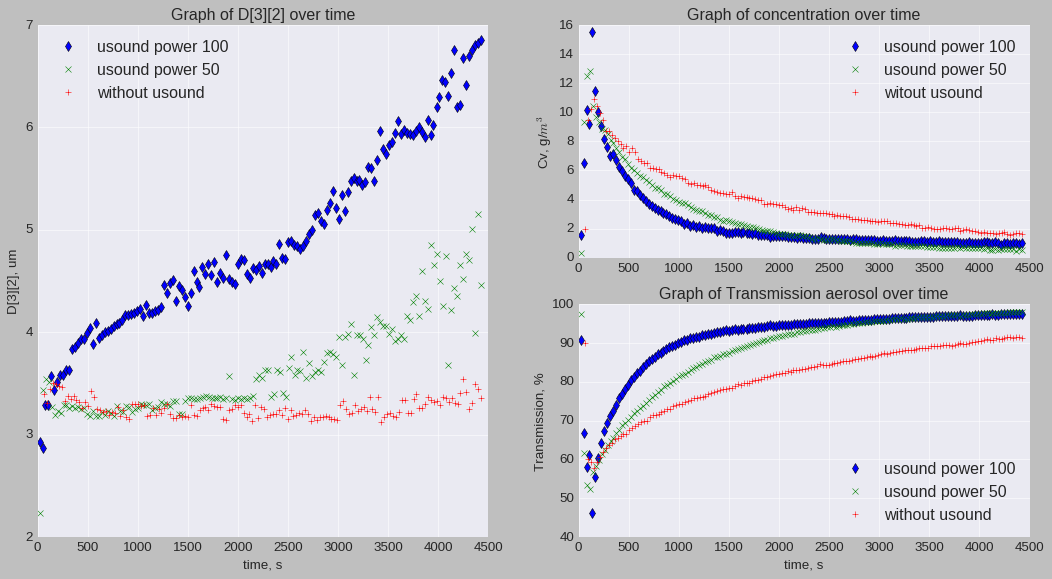

In [645]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16, 8)) 
gs = gridspec.GridSpec(2, 2)
plt.style.use('seaborn-darkgrid')

ax = fig.add_subplot(gs[:, 0])
ax.plot(data_usound_power100['Time (relative)'][x1], data_usound_power100['D[3][2]'][x1], 'd', label='usound power 100')
ax.plot(data_usound_power50['Time (relative)'][x2], data_usound_power50['D[3][2]'][x2], 'x', label='usound power 50')
ax.plot(data_without['Time (relative)'][x], data_without['D[3][2]'][x], '+', label='without usound')
ax.set(title='Graph of D[3][2] over time')
ax.set(xlabel='time, s')
ax.set_ylabel('D[3][2], um')
plt.legend(loc=2)

ax = fig.add_subplot(gs[0, 1])
ax.plot(data_usound_power100['Time (relative)'][x1], data_usound_power100['Cv(%)'][x1]*100000, 'd', label='usound power 100')
ax.plot(data_usound_power50['Time (relative)'][x2], data_usound_power50['Cv(%)'][x2]*100000, 'x', label='usound power 50')
ax.plot(data_without['Time (relative)'][x], data_without['Cv(%)'][x]*100000, '+', label='witout usound')
ax.set(title='Graph of concentration over time')
ax.set_ylabel('Cv, g/$m^3$')
plt.legend(loc=1)

ax = fig.add_subplot(gs[1, 1])
ax.plot(data_usound_power100['Time (relative)'][x1], data_usound_power100['Transmission'][x1], 'd', label='usound power 100')
ax.plot(data_usound_power50['Time (relative)'][x2], data_usound_power50['Transmission'][x2], 'x', label='usound power 50')
ax.plot(data_without['Time (relative)'][x], data_without['Transmission'][x], '+', label='without usound')
ax.set_title('Graph of Transmission aerosol over time')
ax.set(xlabel='time, s')
ax.set(ylabel='Transmission, %')
plt.legend(loc=0);


In [646]:
f_diam_w = data_without.iloc[data_proc_w.index[0]:max_index_proc:10, 7:68]
f_diam_w = f_diam_w.replace('-', 0)
diam = (func.columns)
time1 = data_without.iloc[data_proc_w.index[0]:max_index_proc:10, 3]

f_diam_50 = data_usound_power50.iloc[data_proc_up50.index[0]:data_proc_up50.index[-1]:10, 7:68]
f_diam_50 = f_diam_50.replace('-', 0)
time2 = data_usound_power50.iloc[data_proc_up50.index[0]:data_proc_up50.index[-1]:10, 3]


f_diam_100 = data_usound_power100.iloc[data_proc_up100.index[0]:data_proc_up100.index[-1]:10, 7:68]
f_diam_100 = f_diam_100.replace('-', 0)
time3 = data_usound_power100.iloc[data_proc_up100.index[0]:data_proc_up100.index[-1]:10, 3]

### Графики изменения дисперсного состава аэрозоля от времени при воздействии ультразвука и без воздействия

Graphs of changes in the particle size distribution function over time


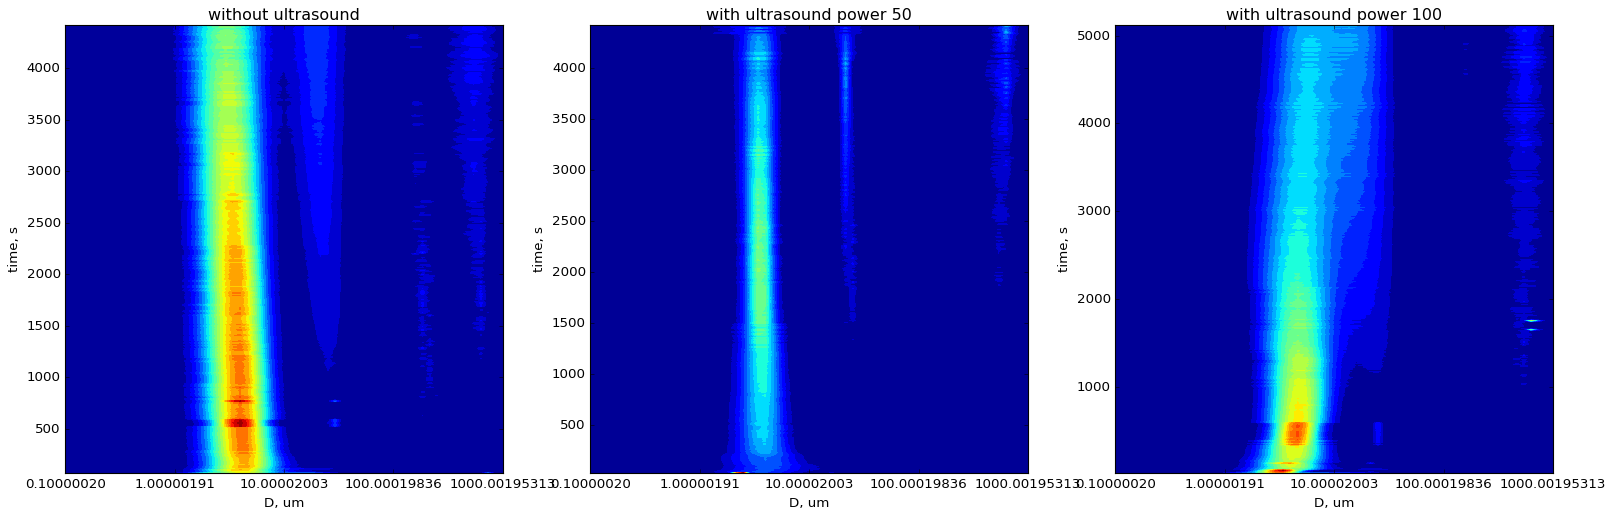

In [647]:
import matplotlib.ticker

print('Graphs of changes in the particle size distribution function over time')
fig = plt.figure(figsize=(24, 7))
gs = gridspec.GridSpec(1, 3)
plt.style.use('classic')


ax = fig.add_subplot(gs[0, 0])
ax.contourf(diam, time1, f_diam_w, 25)
locator = matplotlib.ticker.LinearLocator(5)
ax.xaxis.set_major_locator(locator)
ax.set(title='without ultrasound')
ax.set_ylabel('time, s')
ax.set_xlabel('D, um')

ax = fig.add_subplot(gs[0, 1])
ax.contourf(diam, time2, f_diam_50, 25)
locator = matplotlib.ticker.LinearLocator(5)
ax.xaxis.set_major_locator(locator)
ax.set(title='with ultrasound power 50')
ax.set_ylabel('time, s')
ax.set_xlabel('D, um')

ax = fig.add_subplot(gs[0, 2])
ax.contourf(diam, time3, f_diam_100, 25)
locator = matplotlib.ticker.LinearLocator(5)
ax.xaxis.set_major_locator(locator)
ax.set(title='with ultrasound power 100')
ax.set_ylabel('time, s')
ax.set_xlabel('D, um');
